### IE-423 Project III

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, expon
from scipy.optimize import curve_fit

In [35]:
# Part 3-1
# Image path
image_path = "0046_grayscale.jpg"

# Read the image as grayscale
image = cv2.imread(image_path)

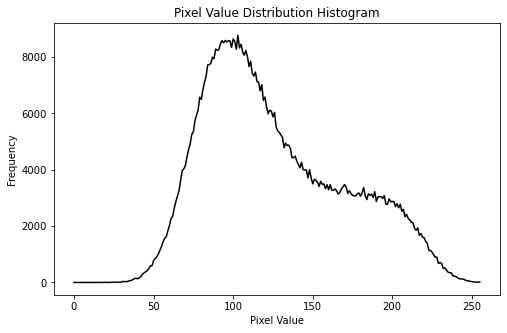

In [36]:
# Calculate histogram
histogram, bin_edges = np.histogram(image, bins=256, range=[0, 256])

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.plot(histogram, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Distribution Histogram')
plt.show()

In [37]:
#Looking at the histogram, probability distribution most likely is a normal distribution.

def fit_distribution(data, distribution):
    params = distribution.fit(data)
    return params

#Part 3-2
# Fit Normal Distribution, return mean , standart deviation and variance
params_normal = fit_distribution(image, norm)
print("Parameters for Normal Distribution:\nmean: ", params_normal[0] ,"\nstdev: ", params_normal[1],"\nvar: ", float(params_normal[1])*float(params_normal[1]))


Parameters for Normal Distribution:
mean:  126.00750732421875 
stdev:  43.84472268972863 
var:  1922.3597077392044


In [38]:
#Part 3-3
modified_image_part3 = image.copy()

In [39]:
# estimated mean and standart deviation before
mean, std_dev = params_normal[0] , params_normal[1]

# Calculate lower and upper bounds for 0.001 probability
lower_bound = norm.ppf(0.001, loc=mean, scale=std_dev)
upper_bound = norm.ppf(0.999, loc=mean, scale=std_dev)

In [40]:
print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)

Lower bound:  -9.482871186549602
Upper bound:  261.4978858349871


In [41]:
# Identify pixels outside the bounds
out_of_bounds_pixels = np.logical_or(modified_image_part3 < lower_bound, modified_image_part3 > upper_bound)

# Set out-of-bound pixels to zero
modified_image_part3[out_of_bounds_pixels] = 0


Text(0.5, 1.0, 'Original Image')

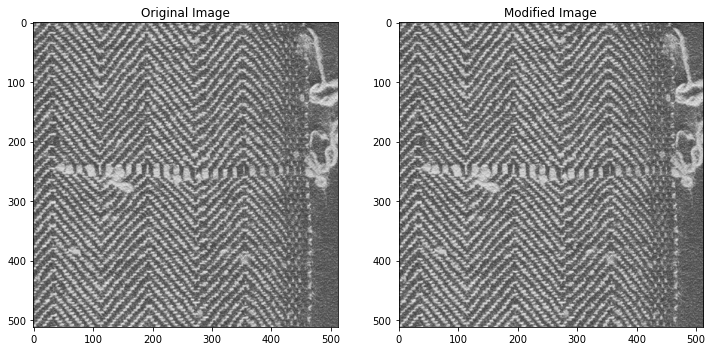

In [42]:
# Plot the original and modified images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.imshow(modified_image_part3)
plt.title('Modified Image')

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

In [43]:
#Part 3-4
# Window size for patches
window_size = 51

# Get image dimensions
rows= 512
cols= 512

# Create a new image for the modified version
modified_image_part4 = image.copy()

In [44]:
# Function to identify pixels outside the probability limits for a patch
def process_patch(patch):
    mean_patch, std_dev_patch = np.mean(patch), np.std(patch)
    lower_bound_patch = norm.ppf(0.001, loc=mean_patch, scale=std_dev_patch)
    upper_bound_patch = norm.ppf(0.999, loc=mean_patch, scale=std_dev_patch)
    out_of_bounds_pixels_patch = np.logical_or(patch < lower_bound_patch, patch > upper_bound_patch)
    patch[out_of_bounds_pixels_patch] = 0
    return patch

# Process each 51x51 patch independently
for r in range(0, rows - window_size + 1, window_size):
    for c in range(0, cols - window_size + 1, window_size):
        patch = modified_image_part4[r:r+window_size, c:c+window_size]
        modified_image_part4[r:r+window_size, c:c+window_size] = process_patch(patch)

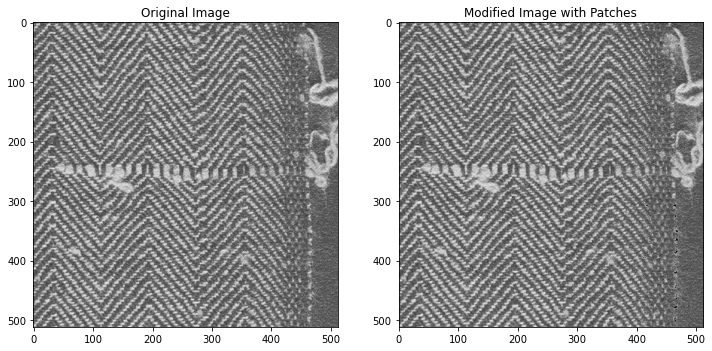

In [45]:
# Plot the original and modified images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(modified_image_part4)
plt.title('Modified Image with Patches')

plt.show()

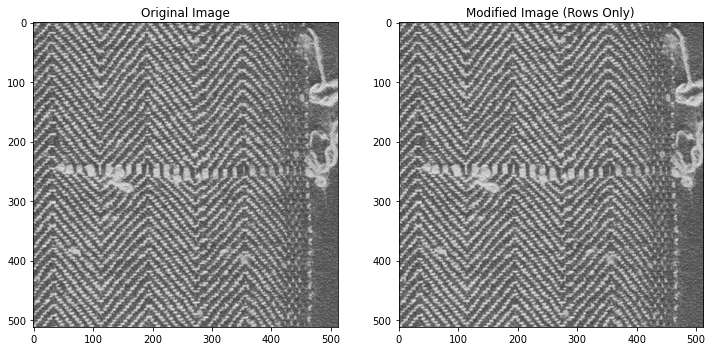

In [46]:
#Part 4-1

modified_image_rows = image.copy()

# Function to replace out-of-control pixels for a single row
def replace_out_of_control_pixels_row(row, row_mean, row_std_dev):
    sigma = 6  # Adjust

    out_of_control_pixels = np.abs(row - row_mean) > sigma * row_std_dev
    row[out_of_control_pixels] = 0  # Set out-of-control pixels to zero

    return row


# Iterate over each row to find mean and standard deviation, and replace out-of-control pixels
for i in range(modified_image_rows.shape[0]):
    row_mean = np.mean(modified_image_rows[i, :])
    row_std_dev = np.std(modified_image_rows[i, :])

    modified_image_rows[i, :] = replace_out_of_control_pixels_row(modified_image_rows[i, :], row_mean, row_std_dev)

# Plot the original and new images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.imshow(modified_image_rows)
plt.title('Modified Image (Rows Only)')

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.show()

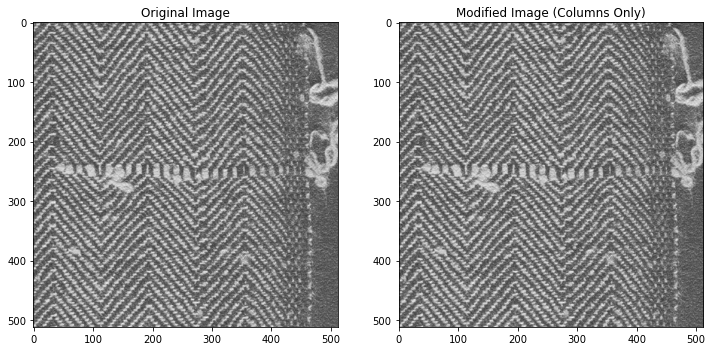

In [47]:
modified_image_columns = image.copy()


# Function to replace out-of-control pixels for a single column
def replace_out_of_control_pixels_column(column, col_mean, col_std_dev):
    sigma = 6  # Adjust this sigma as needed for control limits

    out_of_control_pixels = np.abs(column - col_mean) > sigma * col_std_dev
    column[out_of_control_pixels] = 0  # Set out-of-control pixels to zero

    return column


# Iterate over each column to find mean and standard deviation, and replace out-of-control pixels
for i in range(modified_image_columns.shape[1]):
    col_mean = np.mean(modified_image_columns[:, i])
    col_std_dev = np.std(modified_image_columns[:, i])

    modified_image_columns[:, i] = replace_out_of_control_pixels_column(modified_image_columns[:, i], col_mean,
                                                                        col_std_dev)

# Plot the original and new images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.imshow(modified_image_columns)
plt.title('Modified Image (Columns Only)')

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.show()